# Global Power Plant Database Assignment

In [220]:
from IPython.display import Image
Image(url= "https://th.bing.com/th/id/OIP.6SNayJZ1cWAo5XWZrwIAdgHaED?pid=ImgDet&rs=1")

## Introduction

### Good infrastructure is an essential component for the economic growth of a country, and power plays a crucial role in infrastructure development.
### The majority of thermal power plants in India were set up during the late 1990s and have been facing the problems of declining efficiency.
### A power plant is said to be inefficient if the existing inputs are not utilized in an optimum manner, and as a result, its generation becomes lower than its maximum possible generation.
### Even though the Government of India (GoI) has been trying to focus equally on both the demand and supply side of power, major emphasis has been on capacity addition only.
### Power is among the most critical component of infrastructure, crucial for the economic growth and welfare of nations. The existence and development of adequate infrastructure is essential for sustained growth of the Indian economy.
### India’s power sector is one of the most diversified in the world. Sources of power generation range from conventional sources such as coal, lignite, natural gas, oil, hydro and nuclear power to viable non-conventional sources such as wind, solar, and agricultural and domestic waste. Electricity demand in the country has increased rapidly and is expected to rise further in the years to come. In order to meet the increasing demand for electricity in the country, massive addition to the installed generating capacity is required.

## Description about the Data Columns

### Global Pwer Plant has these Data Columns:
 1)    country                    
 2)  country_long              
 3)   name                     
 4)   gppd_idnr               
 5)  capacity_mw               
 6)  latitude                  
 7)   longitude                
 8)   primary_fuel              
 9)  other_fuel1                
10)   other_fuel2               
11)  other_fuel3               
12)  commissioning_year        
13)  owner                      
14)  source                    
15)  url                       
16)  geolocation_source         
17)  wepp_id                   
18)  year_of_capacity_data     
19)  generation_gwh_2013       
20)  generation_gwh_2014       
21)  generation_gwh_2015       
22)  generation_gwh_2016       
23)  generation_gwh_2017       
24)  generation_data_source     
25)  estimated_generation_gwh

## Importing all the Necessary libraries

In [113]:
pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in c:\users\user\anaconda3\lib\site-packages (0.24.2)
Note: you may need to restart the kernel to use updated packages.


In [214]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# preprocession, normalizing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.decomposition import PCA

# for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# models

from sklearn import model_selection
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix,roc_curve, roc_auc_score

# preprocessing and normalizing
from sklearn.preprocessing import LabelEncoder

# metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



lr = LogisticRegression(random_state = 6)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state = 6)
dt = DecisionTreeClassifier(random_state = 6)


import warnings
warnings.filterwarnings('ignore')
% matplotlib inline

UsageError: Line magic function `%` not found.


#### Above I am importing all the important Libraries in one go so that I can use these libraries to make good Model Prediction.

## CONTEXT

### First I have used Classification preocess for Predicting 'primary_fuel' Prediction than I have applied Regreession Process for Predicting 'capacity_mw' in this Assignment.

## Loading csv data

### Now I am going to upload or read the files/data-sets using pandas. For this we used read_csv

In [115]:
# Reading the dataset

df = pd.read_csv('database_IND.csv')
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


### Then I get the top 5 values. I can get using the head function.

In [116]:
df.shape

(908, 25)

### There are altogether 908 rows and 25 columns in income census dataset.

In [117]:
# lets find out is there any null value in any columns

pd.set_option('display.max_rows',None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

### In Global Pwer Plant India dataset most of the columns are categorical in nature.

### All the columns count are equal that 908 so there is 'NAN' missing values in this dataset.

### There are 13 float64 type columns are 12 object type columns in dataset.

In [118]:
df.drop_duplicates(inplace = True)

In [119]:
df.shape

(908, 25)

### There is no duplicates value in dataset.

In [120]:
df.nunique()

country                       1
country_long                  1
name                        908
gppd_idnr                   908
capacity_mw                 365
latitude                    837
longitude                   828
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013         364
generation_gwh_2014         374
generation_gwh_2015         398
generation_gwh_2016         405
generation_gwh_2017         410
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

### Almost all the columns are categorical in nature only :
#### name,gppd_idnr,capacity_mw,latitude,latitude,longitude,commissioning_year,owner,source,url, generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017 are continous in nature.

In [121]:
df.describe(include='all')

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
count,908,908,908,908,908.000000,862.000000,862.000000,908,199,1,...,889,0.0,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,450,0.0
unique,1,1,908,908,NaN,NaN,NaN,8,3,1,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
top,IND,India,TANAKPUR,WRI1019976,NaN,NaN,NaN,Coal,Oil,Oil,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Central Electricity Authority,NaN
freq,908,908,1,1,NaN,NaN,NaN,259,196,1,...,766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,450,NaN
mean,NaN,NaN,NaN,NaN,321.046378,21.196189,77.447848,NaN,NaN,NaN,...,NaN,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN,NaN
std,NaN,NaN,NaN,NaN,580.221767,6.248627,4.907260,NaN,NaN,NaN,...,NaN,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,8.168900,68.644700,NaN,NaN,NaN,...,NaN,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,16.837500,16.771575,74.258975,NaN,NaN,NaN,...,NaN,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN,NaN
50%,NaN,NaN,NaN,NaN,60.000000,21.778300,76.719250,NaN,NaN,NaN,...,NaN,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN,NaN
75%,NaN,NaN,NaN,NaN,388.125000,25.516375,79.441475,NaN,NaN,NaN,...,NaN,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN,NaN


### Above statistics data show that their multiple outliers.
### There is also difference between mean and 50% value in some of the columns which used to get fix for better prediction.
### Also, number of rows in each column are same, means there are no null values in the data set.
### Also, the mean and 50%value of most of the column are same and the STD and mean are having the huge difference.¶¶
### Most of the column statistics data are near to NaN values that need to be replaced by mean and mode.
### By checking the difference between the 75% and max value there are outliers in some of the column, I will check it soon.

## EDA - Exploratory Data Analysis

### I am going to Drop the unwanted columns.

In [122]:
df.drop('country',inplace=True,axis=1)
df.drop('wepp_id',inplace=True,axis=1)
df.drop('other_fuel3',inplace=True,axis=1)
df.drop('estimated_generation_gwh',inplace=True,axis=1)
df.drop('other_fuel2',inplace=True,axis=1)
df.drop('gppd_idnr',inplace=True,axis=1)
df.drop('country_long',inplace=True,axis=1)
df.drop('url',inplace=True,axis=1)

In [123]:
df.shape

(908, 17)

### After Removing the unwanted columns I got 908 rows and 17 columns

## Count Plot

**primary_fuel**

In [124]:
df['primary_fuel'].value_counts()

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

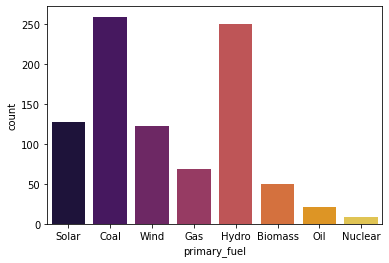

In [125]:
sns.countplot(df['primary_fuel'],palette = 'inferno',data=df);

### From the above countplot I can say 'primary_fuel' uses Coal(259) capacity more rather than the remaining ones for Global Power Plant.

**other_fuel1**

In [126]:
df['other_fuel1'].value_counts()

Oil             196
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

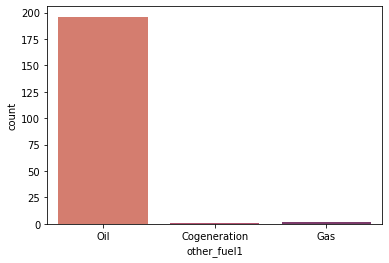

In [127]:
sns.countplot(df['other_fuel1'],palette = 'flare',data=df);

### According to my countplot of 'other_fuel1' i can see Oil is the main necessity god for Global Power Plant.

**geolocation_source**

In [128]:
df['geolocation_source'].value_counts()

WRI                                     766
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

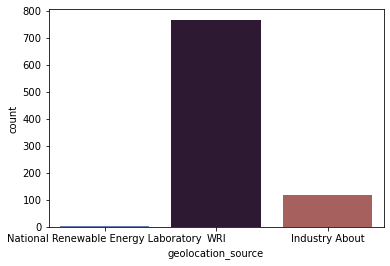

In [129]:
sns.countplot(df['geolocation_source'],palette = 'twilight',data=df);

### Geolocation_source count plot shows "WRI" containg 786 values in this diagram which will have major effect in Global Power Plant.

**year_of_capacity_data**

In [130]:
df['year_of_capacity_data'].value_counts()

2018.0    520
Name: year_of_capacity_data, dtype: int64

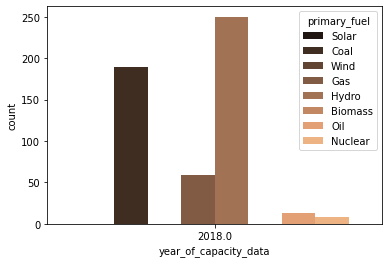

In [131]:
sns.countplot(df['year_of_capacity_data'],palette = 'copper',hue='primary_fuel',data=df);

### In this Global Power Plant Project it shows that Year-2018 plays a vital role by using coal as major commodity for Generating Electricity.¶

**generation_data_source**

In [132]:
df['generation_data_source'].value_counts()

Central Electricity Authority    450
Name: generation_data_source, dtype: int64

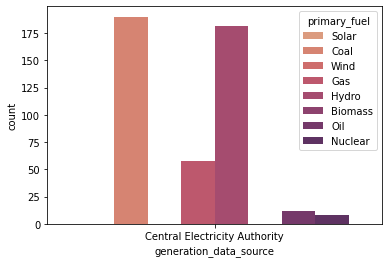

In [133]:
sns.countplot(df['generation_data_source'],palette = 'flare',hue='primary_fuel',data=df);

### Generation_data_source count plot shows "Central Electricity Authority" containg 450 values in this diagram which shows Central Electricity Authorityhas a major role in Global Power Plant.

## Filling the missing values

In [134]:
# filling the missing values of continious columns
df['latitude'].fillna(df['latitude'].mean(),inplace=True)
df['longitude'].fillna(df['longitude'].mean(),inplace=True)
df['year_of_capacity_data'].fillna(df['year_of_capacity_data'].mean(),inplace=True)
df['generation_gwh_2013'].fillna(df['generation_gwh_2013'].mean(),inplace=True)
df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].mean(),inplace=True)
df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mean(),inplace=True)
df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].mean(),inplace=True)
df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].mean(),inplace=True)

# filling the missing values of categorical columns
df['commissioning_year'].fillna(df['commissioning_year'].mode()[0],inplace=True)
df['other_fuel1'].fillna(df['other_fuel1'].mode()[0],inplace=True)
df['generation_data_source'].fillna(df['generation_data_source'].mode()[0],inplace=True)
df['owner'].fillna(df['owner'].mode()[0],inplace=True)
df['geolocation_source'].fillna(df['geolocation_source'].mode()[0],inplace=True)

In [135]:
df.isnull().sum()

name                      0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
commissioning_year        0
owner                     0
source                    0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_data_source    0
dtype: int64

In [136]:
df.head()

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,Oil,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,Oil,2013.0,Ultratech Cement ltd,Ultratech Cement ltd,WRI,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,Oil,2013.0,AES,CDM,WRI,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,Oil,2004.0,Acc Acc ltd,Central Electricity Authority,WRI,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Acc Acc ltd,Central Electricity Authority,WRI,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority


### From the dataset i have removed all the missing values('NaN').

## Label Encoding

In [137]:
le = LabelEncoder()
df.primary_fuel = le.fit_transform(df.primary_fuel)
df.other_fuel1 = le.fit_transform(df.other_fuel1)
df.geolocation_source = le.fit_transform(df.geolocation_source)
df.generation_data_source = le.fit_transform(df.generation_data_source)
df.name = le.fit_transform(df.name)
df.source = le.fit_transform(df.source)
df.owner = le.fit_transform(df.owner)

In [138]:
df.head()

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,0,2.5,28.1839,73.2407,6,2,2011.0,229,109,1,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0
1,1,98.0,24.7663,74.6090,1,2,2013.0,258,174,2,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0
2,2,39.2,21.9038,69.3732,7,2,2013.0,2,21,2,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0
3,3,135.0,23.8712,91.3602,2,2,2004.0,5,22,2,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,0
4,4,1800.0,21.9603,82.4091,1,2,2015.0,5,22,2,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,0


In [139]:
df.describe()

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
count,908.00000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.0,908.000000,908.000000,908.000000,908.000000,908.000000,908.0
mean,453.50000,321.046378,21.196189,77.447848,3.205947,1.995595,2003.624449,56.113436,43.823789,1.733480,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0.0
std,262.26132,580.221767,6.088110,4.781201,2.281339,0.081214,15.238021,82.501086,44.624092,0.676835,0.0,2465.930970,2665.360236,2860.146282,2878.730064,2923.041411,0.0
min,0.00000,0.000000,8.168900,68.644700,0.000000,0.000000,1927.000000,0.000000,0.000000,0.000000,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,226.75000,16.837500,17.057825,74.390250,1.000000,2.000000,1997.000000,5.000000,22.000000,2.000000,2018.0,1332.538825,1175.264825,874.205000,826.629750,852.438887,0.0
50%,453.50000,60.000000,21.278850,76.978950,3.000000,2.000000,2013.000000,5.000000,22.000000,2.000000,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0.0
75%,680.25000,388.125000,25.183775,79.211600,6.000000,2.000000,2013.000000,95.250000,29.250000,2.000000,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0.0
max,907.00000,4760.000000,34.649000,95.408000,7.000000,2.000000,2018.000000,279.000000,190.000000,2.000000,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,0.0


### After Applying Label Encoder i have converted all the strings columns into integer.
### From the describe code i can say that there are few zero values in this dataset which i will replace soon.
### Now I can see that there are few outliers in the dataset which I will rectify with zscore.

## Replacing all the zero values from different columns

In [140]:
# Replacing continous columns with mean
df['capacity_mw'] = df['capacity_mw'].replace(0,df['capacity_mw'].mean())
df['generation_gwh_2013'] = df['generation_gwh_2013'].replace(0,df['generation_gwh_2013'].mean())
df['generation_gwh_2014'] = df['generation_gwh_2014'].replace(0,df['generation_gwh_2014'].mean())
df['generation_gwh_2015'] = df['generation_gwh_2015'].replace(0,df['generation_gwh_2015'].mean())
df['generation_gwh_2016'] = df['generation_gwh_2016'].replace(0,df['generation_gwh_2016'].mean())
df['generation_gwh_2017'] = df['generation_gwh_2017'].replace(0,df['generation_gwh_2017'].mean())
df['name'] = df['name'].replace(0,df['name'].mean())

In [141]:
# Replacing categorial columns with mode
df['owner']=df['owner'].replace(0,df['owner'].mode()[0])
df['source']=df['source'].replace(0,df['source'].mode()[0])
df['primary_fuel']=df['primary_fuel'].replace(0,df['primary_fuel'].mode()[0])
df['other_fuel1']=df['other_fuel1'].replace(0,df['other_fuel1'].mode()[0])
df['geolocation_source']=df['geolocation_source'].replace(0,df['geolocation_source'].mode()[0])
df['generation_data_source']=df['generation_data_source'].replace(0,df['generation_data_source'].mode()[0])

### According to the Dataset these 13 columns (capacity_mw,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,name,owner,source,primary_fuel,other_fuel1,geolocation_source,generation_data_source) have zero values which i have replace it.

In [142]:
df.describe(include='all')

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.0,908.000000,908.000000,908.000000,908.000000,908.000000,908.0
mean,453.999449,321.399953,21.196189,77.447848,3.261013,1.997797,2003.624449,56.118943,43.848018,1.995595,2018.0,2357.346915,2495.030996,2488.515134,2537.716055,2623.767560,0.0
std,261.828188,580.123724,6.088110,4.781201,2.214301,0.046906,15.238021,82.497504,44.606240,0.066262,0.0,2440.299044,2630.155232,2827.539668,2841.521269,2881.403117,0.0
min,1.000000,1.000000,8.168900,68.644700,1.000000,1.000000,1927.000000,1.000000,1.000000,1.000000,2018.0,0.019900,0.045355,0.118300,0.099500,0.425769,0.0
25%,227.750000,16.987500,17.057825,74.390250,1.000000,2.000000,1997.000000,5.000000,22.000000,2.000000,2018.0,1663.834050,1610.740250,1291.945312,1338.095175,1429.468075,0.0
50%,453.750000,60.000000,21.278850,76.978950,3.000000,2.000000,2013.000000,5.000000,22.000000,2.000000,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0.0
75%,680.250000,388.125000,25.183775,79.211600,6.000000,2.000000,2013.000000,95.250000,29.250000,2.000000,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0.0
max,907.000000,4760.000000,34.649000,95.408000,7.000000,2.000000,2018.000000,279.000000,190.000000,2.000000,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,0.0


### I have removed all the zero values from the dataset differnet colums. Further i will work on skewness.

## Histogram Plot

array([[<AxesSubplot:title={'center':'name'}>,
        <AxesSubplot:title={'center':'capacity_mw'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>],
       [<AxesSubplot:title={'center':'primary_fuel'}>,
        <AxesSubplot:title={'center':'other_fuel1'}>,
        <AxesSubplot:title={'center':'commissioning_year'}>,
        <AxesSubplot:title={'center':'owner'}>],
       [<AxesSubplot:title={'center':'source'}>,
        <AxesSubplot:title={'center':'geolocation_source'}>,
        <AxesSubplot:title={'center':'year_of_capacity_data'}>,
        <AxesSubplot:title={'center':'generation_gwh_2013'}>],
       [<AxesSubplot:title={'center':'generation_gwh_2014'}>,
        <AxesSubplot:title={'center':'generation_gwh_2015'}>,
        <AxesSubplot:title={'center':'generation_gwh_2016'}>,
        <AxesSubplot:title={'center':'generation_gwh_2017'}>],
       [<AxesSubplot:title={'center':'generation_data_source'}>,
        <AxesSubplot:>, <

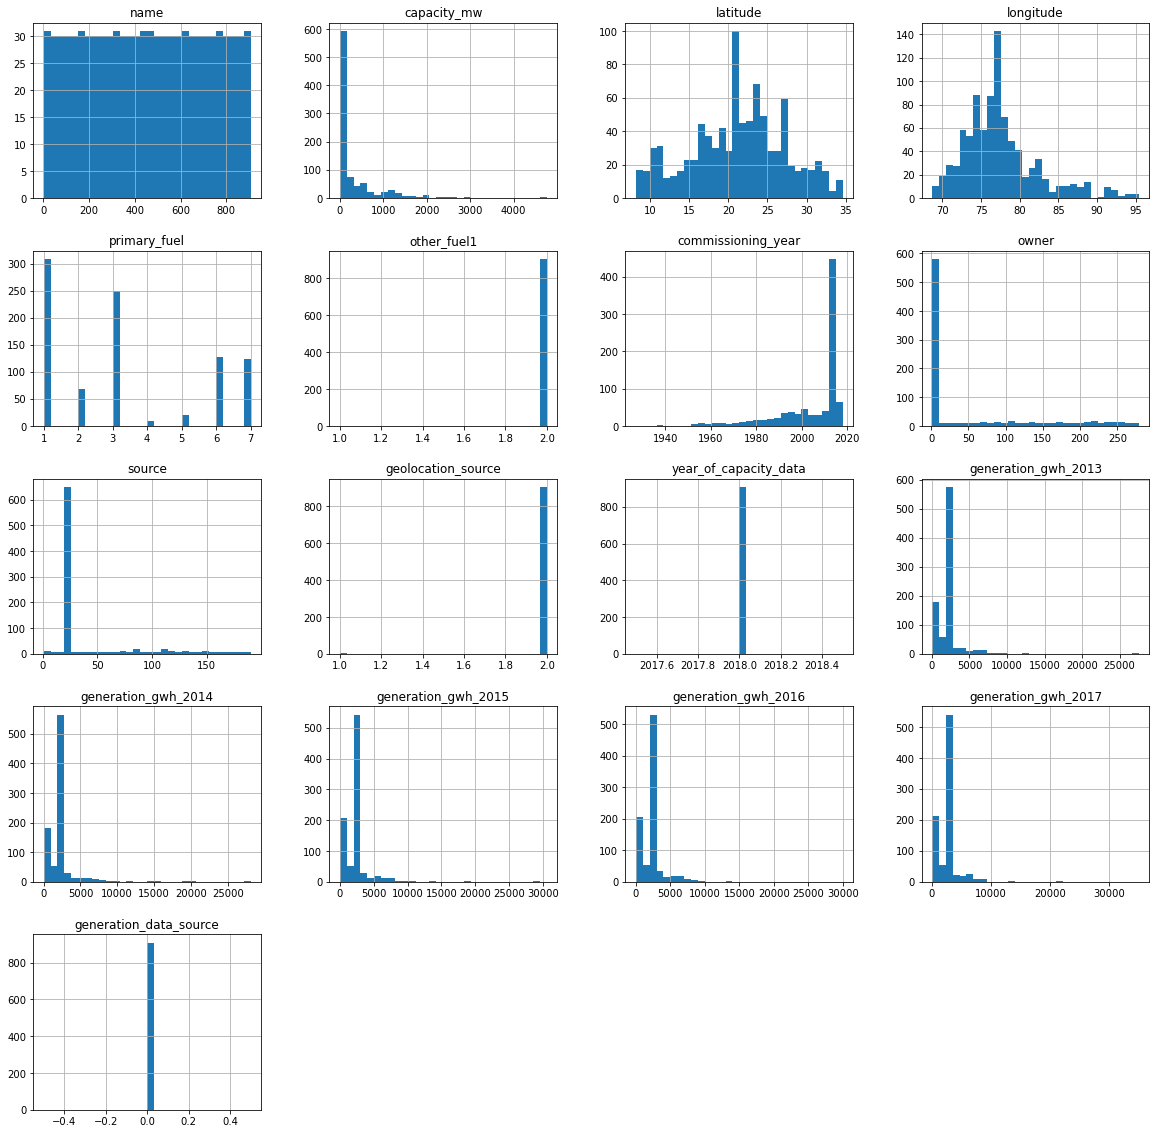

In [143]:
# ploting histogram to check the skewness

df.hist(figsize=(20,20),grid=True,layout=(5,4),bins=30)

## Box Plot

name                         AxesSubplot(0.125,0.749828;0.168478x0.130172)
capacity_mw               AxesSubplot(0.327174,0.749828;0.168478x0.130172)
latitude                  AxesSubplot(0.529348,0.749828;0.168478x0.130172)
longitude                 AxesSubplot(0.731522,0.749828;0.168478x0.130172)
primary_fuel                 AxesSubplot(0.125,0.593621;0.168478x0.130172)
other_fuel1               AxesSubplot(0.327174,0.593621;0.168478x0.130172)
commissioning_year        AxesSubplot(0.529348,0.593621;0.168478x0.130172)
owner                     AxesSubplot(0.731522,0.593621;0.168478x0.130172)
source                       AxesSubplot(0.125,0.437414;0.168478x0.130172)
geolocation_source        AxesSubplot(0.327174,0.437414;0.168478x0.130172)
year_of_capacity_data     AxesSubplot(0.529348,0.437414;0.168478x0.130172)
generation_gwh_2013       AxesSubplot(0.731522,0.437414;0.168478x0.130172)
generation_gwh_2014          AxesSubplot(0.125,0.281207;0.168478x0.130172)
generation_gwh_2015      

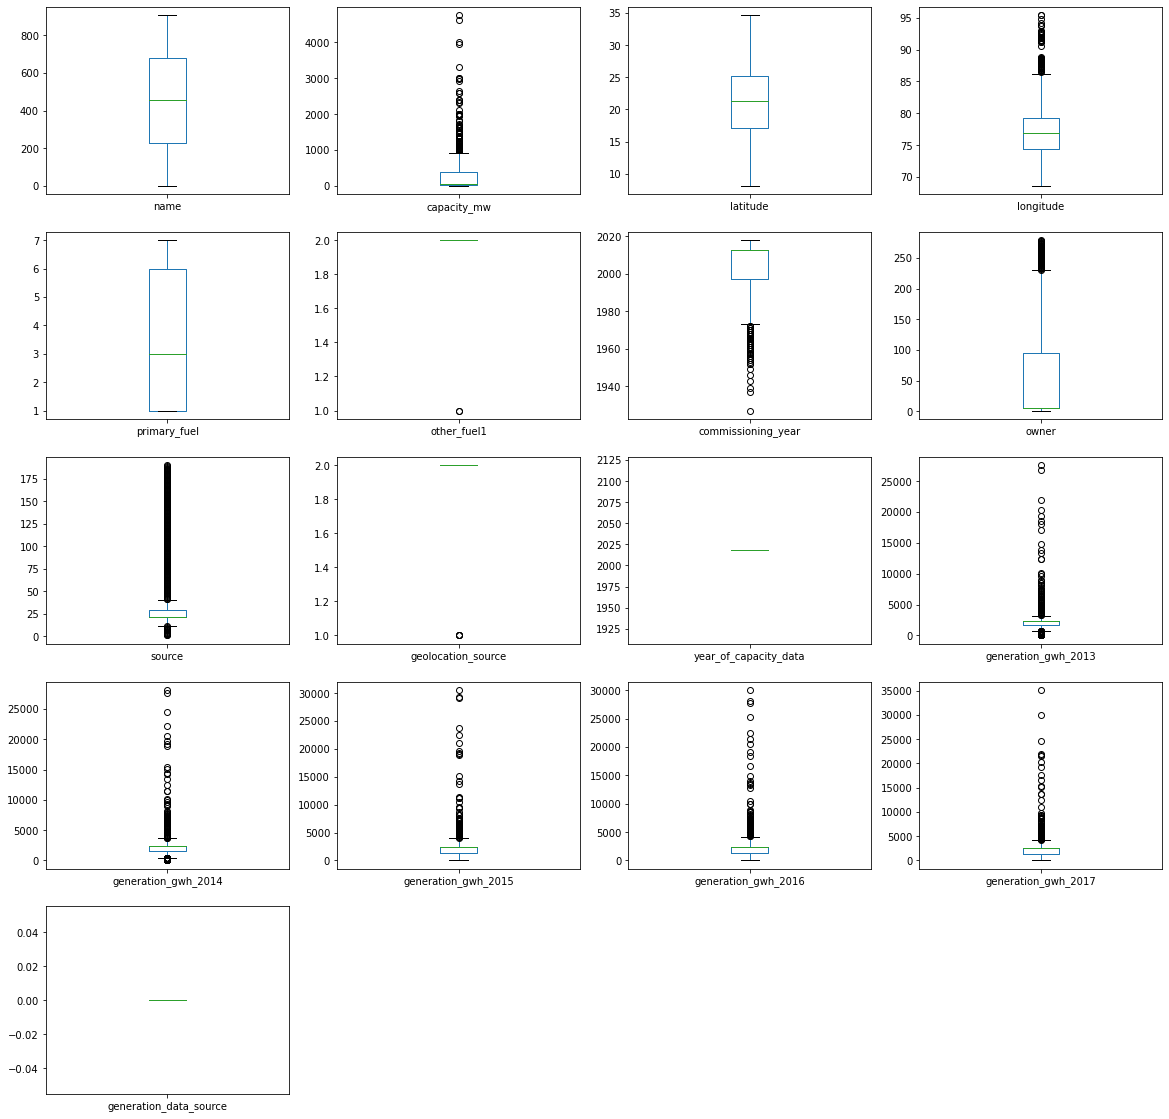

In [144]:
df.plot(kind='box',subplots=True,layout=(5,4),figsize=(20,20))

## Z score

In [145]:
z_score = zscore(df[['capacity_mw','longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis = 1)
df = df[filtering_entry]
df.describe()

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
count,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.00000,867.000000,867.000000,867.000000,867.0,867.000000,867.000000,867.000000,867.000000,867.000000,867.0
mean,452.302768,263.231266,21.093784,77.025306,3.325260,1.997693,2003.82699,58.359862,44.779700,1.995386,2018.0,2117.758023,2219.681312,2186.854870,2234.025144,2315.400173,0.0
std,263.222150,416.346783,6.157370,4.200192,2.232522,0.048001,15.30755,83.608262,45.342562,0.067806,0.0,1336.035117,1414.520126,1463.166814,1516.631629,1557.873000,0.0
min,1.000000,1.000000,8.168900,68.644700,1.000000,1.000000,1927.00000,1.000000,1.000000,1.000000,2018.0,0.019900,0.045355,0.118300,0.099500,0.425769,0.0
25%,223.500000,16.500000,16.899050,74.318150,1.000000,2.000000,1998.00000,5.000000,22.000000,2.000000,2018.0,1682.736000,1627.942650,1331.777650,1365.502290,1477.737225,0.0
50%,453.000000,50.400000,21.196189,76.737000,3.000000,2.000000,2013.00000,5.000000,22.000000,2.000000,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0.0
75%,679.500000,320.523189,25.134100,78.906250,6.000000,2.000000,2013.00000,104.500000,38.500000,2.000000,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0.0
max,907.000000,2000.000000,34.649000,91.565000,7.000000,2.000000,2018.00000,279.000000,190.000000,2.000000,2018.0,8965.595000,9983.018000,10422.690000,10503.882000,9833.690000,0.0


In [146]:
df.head()

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,453.5,2.5,28.1839,73.2407,6,2,2011.0,229,109,1,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0
1,1.0,98.0,24.7663,74.6090,1,2,2013.0,258,174,2,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0
2,2.0,39.2,21.9038,69.3732,7,2,2013.0,2,21,2,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0
3,3.0,135.0,23.8712,91.3602,2,2,2004.0,5,22,2,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,0
4,4.0,1800.0,21.9603,82.4091,1,2,2015.0,5,22,2,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,0


In [147]:
df.shape

(867, 17)

### From above image we can clear see that there are number of black dots in most of the column which are referring to the outliers, so it means most of the data are outside the distribution.****
### So now we detect the outliers now the second step is to remove the outliers, there are different way to remove the outliers i have used z score above to remove outliers.

array([[<AxesSubplot:title={'center':'name'}>,
        <AxesSubplot:title={'center':'capacity_mw'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>],
       [<AxesSubplot:title={'center':'primary_fuel'}>,
        <AxesSubplot:title={'center':'other_fuel1'}>,
        <AxesSubplot:title={'center':'commissioning_year'}>,
        <AxesSubplot:title={'center':'owner'}>],
       [<AxesSubplot:title={'center':'source'}>,
        <AxesSubplot:title={'center':'geolocation_source'}>,
        <AxesSubplot:title={'center':'year_of_capacity_data'}>,
        <AxesSubplot:title={'center':'generation_gwh_2013'}>],
       [<AxesSubplot:title={'center':'generation_gwh_2014'}>,
        <AxesSubplot:title={'center':'generation_gwh_2015'}>,
        <AxesSubplot:title={'center':'generation_gwh_2016'}>,
        <AxesSubplot:title={'center':'generation_gwh_2017'}>],
       [<AxesSubplot:title={'center':'generation_data_source'}>,
        <AxesSubplot:>, <

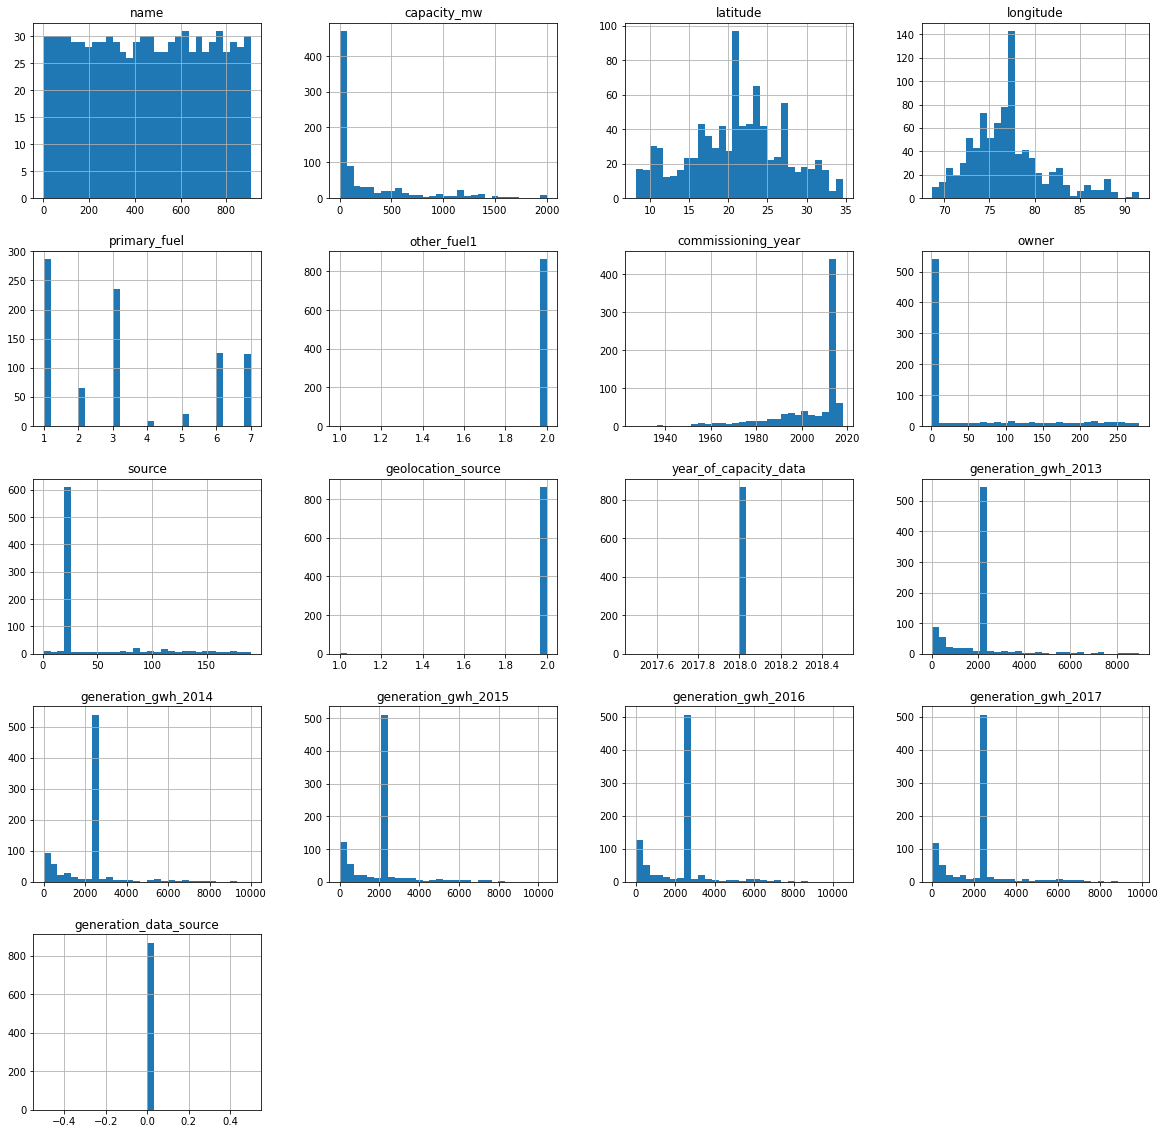

In [148]:
# ploting histogram to check the skewness

df.hist(figsize=(20,20),grid=True,layout=(5,4),bins=30)

### After Removing Outliers & Skewness I make Histogram Plot to understand how much my data is ready for Model Prediction.

## Classification Model

### Using Primary Fuel as a prediction

In [36]:
# dividing features and label

x = df.drop('primary_fuel',axis=1)
y = df.primary_fuel

### Separate response variable and features in x & y.

## StandardScaler

### The scikit library provides various types of scalers including MinMax Scaler and the StandardScaler.
### Below I will use the StandardScaler to scale the data.

In [37]:
# standard scaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 0.004551  , -0.62659728,  1.15214913, ...,  0.1450834 ,
         0.13895816,  0.        ],
       [-1.71552151, -0.39708878,  0.5967866 , ...,  0.1450834 ,
         0.13895816,  0.        ],
       [-1.71172024, -0.53839872,  0.13162823, ...,  0.1450834 ,
         0.13895816,  0.        ],
       ...,
       [ 1.72082223, -0.57132298, -0.94542669, ...,  0.1450834 ,
         0.13895816,  0.        ],
       [ 1.7246235 , -0.44034693,  0.52913754, ...,  0.1450834 ,
         0.13895816,  0.        ],
       [ 1.72842477, -0.59295205, -1.81340815, ...,  0.1450834 ,
         0.13895816,  0.        ]])

### By Using Standard Scaler I have scaled the data in scaled one

## VIF - variance inflation factor

In [38]:
# finding variance inflation factor(vif)

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,1.074737,name
1,2.040582,capacity_mw
2,1.064051,latitude
3,1.166226,longitude
4,1.024478,other_fuel1
5,1.305293,commissioning_year
6,3.127762,owner
7,2.542739,source
8,1.018545,geolocation_source
9,NaN,year_of_capacity_data


### By using Variance Inflation Factor(VIF) I can see that there is a no strong relationship among any Features as values are less than 5.


## Model Building

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state = 370)

### Splitting the dataset into the Training set and Test set.
### The data should be divided into train and test data.
### I will use train_test_split feature to divide the data and I will be using testing set of 25% and a training set of 75% of the data.
### I can set the random state of the split to ensure consistent results.


## Logistic Regression

In [43]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [46]:
y_pred = log_reg.predict(x_test)

In [47]:
y_pred_proba = log_reg.predict_proba(x_test)

In [48]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[50,  1, 12,  0,  0,  7,  1],
       [ 4,  1,  8,  0,  1,  0,  0],
       [ 7,  0, 50,  0,  0,  0,  0],
       [ 2,  0,  3,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  1],
       [ 4,  0,  0,  0,  0, 25,  6],
       [ 1,  0,  0,  0,  0,  1, 31]], dtype=int64)

In [49]:
log_reg.score(x_test,y_test)

0.728110599078341

In [50]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           1       0.74      0.70      0.72        71
           2       0.50      0.07      0.12        14
           3       0.68      0.88      0.77        57
           4       0.00      0.00      0.00         5
           5       0.50      0.50      0.50         2
           6       0.76      0.71      0.74        35
           7       0.79      0.94      0.86        33

    accuracy                           0.73       217
   macro avg       0.57      0.54      0.53       217
weighted avg       0.70      0.73      0.70       217



### By using Logistic Regression I Get Accuracy Score : 73%.

### After modelling Logistic Regression then my next step is to find Auc Score.
### Below is the Auc Score:

In [51]:
roc_auc_score(y_test,y_pred_proba,multi_class="ovr")

0.8950663245953075

### So, i get Auc score for logistic regression is 89.5 %

## KNN

#### After using Logistic Regression I use Knn Model to predict the Primary Fuel.
#### Therefore, my first work is to use best feature method selection method which I will use with KNN model.

## Using SelectKBest Method for best features selection

In [52]:
best_features = SelectKBest(score_func=f_classif,k=12)
fit = best_features.fit(x,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(x.columns)

# concatenate Dataframe
feature_scores = pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns = ['Features_Name','Score']
print(feature_scores.nlargest(12,'Score'))

          Features_Name       Score
5    commissioning_year  104.546213
7                source   76.625253
6                 owner   56.680864
14  generation_gwh_2017   51.234738
13  generation_gwh_2016   47.320573
1           capacity_mw   44.854156
11  generation_gwh_2014   41.515761
12  generation_gwh_2015   41.003124
10  generation_gwh_2013   35.478072
3             longitude   30.041199
4           other_fuel1   14.722273
2              latitude   13.193182


#### So, by using Best Feature Method i can say that 'commissioning_year' is the main source for primary Fuel prediction.
#### After then i will check remainings feilds of columns.

In [53]:
knn = KNeighborsClassifier()

knn.fit(x_train,y_train)
y_pred_proba = knn.predict_proba(x_test)

In [54]:
y_pred = knn.predict(x_test)

In [55]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[54,  1,  8,  0,  0,  7,  1],
       [ 4,  4,  5,  0,  0,  0,  1],
       [ 8,  0, 49,  0,  0,  0,  0],
       [ 3,  0,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  1],
       [ 7,  0,  0,  0,  0, 23,  5],
       [10,  0,  0,  0,  0,  0, 23]], dtype=int64)

In [56]:
knn.score(x_test,y_test)

0.7096774193548387

In [57]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           1       0.63      0.76      0.69        71
           2       0.80      0.29      0.42        14
           3       0.77      0.86      0.81        57
           4       0.00      0.00      0.00         5
           5       1.00      0.50      0.67         2
           6       0.77      0.66      0.71        35
           7       0.74      0.70      0.72        33

    accuracy                           0.71       217
   macro avg       0.67      0.54      0.57       217
weighted avg       0.70      0.71      0.69       217



#### According to my perception of modelling KNN I got Accuracy Score : 71%.
#### But this score can improve the accuracy by using Grid Search CV.

## Let use Grid search CV for the best parameter to improve the accuracy

In [58]:
param_grid = {'algorithm':['kd_tree','brute'],
             'leaf_size':[15,18],
             'n_neighbors':[3,5,7]
             }

In [59]:
gridsearch = GridSearchCV(estimator=knn,param_grid=param_grid)

In [60]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [15, 18], 'n_neighbors': [3, 5, 7]})

In [61]:
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 15, 'n_neighbors': 5}

In [62]:
knn = KNeighborsClassifier(algorithm = 'kd_tree', leaf_size = 15, n_neighbors=5)

In [63]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=15)

In [64]:
y_pred_proba = knn.predict_proba(x_test)

In [65]:
y_pred = knn.predict(x_test)

In [66]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[54,  1,  8,  0,  0,  7,  1],
       [ 4,  4,  5,  0,  0,  0,  1],
       [ 8,  0, 49,  0,  0,  0,  0],
       [ 3,  0,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  1],
       [ 7,  0,  0,  0,  0, 23,  5],
       [10,  0,  0,  0,  0,  0, 23]], dtype=int64)

In [67]:
knn.score(x_test,y_test)

0.7096774193548387

In [68]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           1       0.63      0.76      0.69        71
           2       0.80      0.29      0.42        14
           3       0.77      0.86      0.81        57
           4       0.00      0.00      0.00         5
           5       1.00      0.50      0.67         2
           6       0.77      0.66      0.71        35
           7       0.74      0.70      0.72        33

    accuracy                           0.71       217
   macro avg       0.67      0.54      0.57       217
weighted avg       0.70      0.71      0.69       217



#### By using Grid Search CV I improve the Accuracy Score : 71%
#### After modelling Knn then my next step is to find Auc Score.
### Below is the Auc Score:

In [69]:
roc_auc_score(y_test,y_pred_proba,multi_class="ovr")

0.8081401636128959

### So, I get Auc Score From KNN is 80.81%

## RandomForestClassifier

### After using KNN I use RandomForestClassifier to predict the Primary Fuel.

In [70]:
rfc = RandomForestClassifier()

rfc.fit(x_train,y_train)
y_pred_proba = rfc.predict_proba(x_test)

In [71]:
y_pred = rfc.predict(x_test)

In [72]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[61,  0,  7,  0,  0,  3,  0],
       [ 3,  3,  5,  0,  3,  0,  0],
       [ 4,  0, 53,  0,  0,  0,  0],
       [ 5,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0, 32,  1],
       [ 0,  0,  0,  0,  0,  0, 33]], dtype=int64)

In [73]:
rfc.score(x_test,y_test)

0.8387096774193549

In [74]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           1       0.81      0.86      0.84        71
           2       0.60      0.21      0.32        14
           3       0.82      0.93      0.87        57
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         2
           6       0.91      0.91      0.91        35
           7       0.97      1.00      0.99        33

    accuracy                           0.84       217
   macro avg       0.59      0.56      0.56       217
weighted avg       0.81      0.84      0.82       217



### According to my perception of modelling RandomForestClassifier I got Accuracy Score : 84%.
### But this score can improve the accuracy by using Grid Search CV.

## Let use Grid search CV for the best parameter to improve the accuracy

In [75]:
params = {'n_estimators':[13,15],
         'criterion':['entropy'],
         'max_depth':[10],
         'min_samples_split':[10,11],
         'min_samples_leaf':[5,6]
         }

grd = GridSearchCV(rfc,param_grid=params)
grd.fit(x_train,y_train)
print(grd.best_params_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 15}


In [76]:
rfc = grd.best_estimator_

In [77]:
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                       min_samples_split=10, n_estimators=15)

In [78]:
y_pred_proba = rfc.predict_proba(x_test)

In [79]:
y_pred = rfc.predict(x_test)

In [80]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[57,  0, 10,  0,  0,  3,  1],
       [ 3,  2,  8,  0,  1,  0,  0],
       [ 5,  0, 52,  0,  0,  0,  0],
       [ 5,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  1],
       [ 3,  0,  1,  0,  0, 28,  3],
       [ 0,  0,  0,  0,  0,  0, 33]], dtype=int64)

In [81]:
rfc.score(x_test,y_test)

0.7926267281105991

In [82]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           1       0.78      0.80      0.79        71
           2       0.67      0.14      0.24        14
           3       0.73      0.91      0.81        57
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         2
           6       0.90      0.80      0.85        35
           7       0.87      1.00      0.93        33

    accuracy                           0.79       217
   macro avg       0.56      0.52      0.52       217
weighted avg       0.77      0.79      0.77       217



### By using Grid Search CV I improve the Accuracy Score : 79%
### After modelling Random Forest then my next step is to find Auc Score.
### Below is the Auc Score:

In [83]:
roc_auc_score(y_test,y_pred_proba,multi_class="ovr")

0.921960225968294

### So, I get Auc Score From KNN is 92.19%

## Decision Tree Classifier

### After using Random Forest Classifier I use Decision Tree Classifier to predict the Primary fuel.

In [84]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred_proba = dtc.predict_proba(x_test)

In [85]:
y_pred = dtc.predict(x_test)

In [86]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[56,  7,  4,  0,  1,  3,  0],
       [ 4,  5,  4,  0,  0,  1,  0],
       [ 4,  3, 50,  0,  0,  0,  0],
       [ 4,  0,  0,  1,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0],
       [ 2,  1,  0,  0,  0, 31,  1],
       [ 0,  0,  0,  0,  0,  0, 33]], dtype=int64)

In [87]:
dtc.score(x_test,y_test)

0.8110599078341014

In [88]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           1       0.80      0.79      0.79        71
           2       0.28      0.36      0.31        14
           3       0.86      0.88      0.87        57
           4       1.00      0.20      0.33         5
           5       0.00      0.00      0.00         2
           6       0.89      0.89      0.89        35
           7       0.97      1.00      0.99        33

    accuracy                           0.81       217
   macro avg       0.69      0.59      0.60       217
weighted avg       0.82      0.81      0.81       217



### According to my perception of modelling Decision Tree Classifier I got Accuracy Score : 81%.
### But this score can improve the accuracy by using Grid Search CV.


## Let use Grid search CV for the best parameter to improve the accuracy

In [89]:
grid_param = {'criterion':['gini','entropy'],
             'max_depth':range(2,10,3),
             'min_samples_leaf':range(1,10,2),
             'min_samples_split':range(2,10,2)
             }

In [90]:
grid_search = GridSearchCV(estimator=dtc,
                          param_grid=grid_param,
                          cv=5,
                          n_jobs=1)

In [91]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10, 3),
                         'min_samples_leaf': range(1, 10, 2),
                         'min_samples_split': range(2, 10, 2)})

In [92]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 8}


In [93]:
dtc = DecisionTreeClassifier(criterion='gini',max_depth=8,min_samples_leaf=5,min_samples_split=2)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=5)

In [94]:
y_pred_proba = dtc.predict_proba(x_test)

In [95]:
y_pred = dtc.predict(x_test)

In [104]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[55,  4, 10,  0,  0,  2,  0],
       [ 2,  5,  6,  0,  1,  0,  0],
       [ 2,  0, 53,  0,  2,  0,  0],
       [ 3,  2,  0,  0,  0,  0,  0],
       [ 1,  1,  0,  0,  0,  0,  0],
       [ 4,  0,  0,  0,  0, 30,  1],
       [ 0,  0,  0,  0,  0,  0, 33]], dtype=int64)

In [97]:
dtc.score(x_test,y_test)

0.8110599078341014

In [98]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8110599078341014

In [99]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           1       0.82      0.77      0.80        71
           2       0.42      0.36      0.38        14
           3       0.77      0.93      0.84        57
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         2
           6       0.94      0.86      0.90        35
           7       0.97      1.00      0.99        33

    accuracy                           0.81       217
   macro avg       0.56      0.56      0.56       217
weighted avg       0.80      0.81      0.80       217



### By using Grid Search CV I improve the Accuracy Score : 81%
### After modelling Decision Tree Classifier then my next step is to find Auc Score.
### Below is the Auc Score:

In [100]:
roc_auc_score(y_test,y_pred_proba,multi_class="ovr")

0.7889410514167458

### So, I get Auc Score From Decision Tree Classifier is 78.89%

## Saving the Best Model

In [489]:
# saving the Random Forest Regressor Model

filename = 'finalized_model.pickle'
pickle.dump(rfc,open(filename,'wb'))

loaded_model = pickle.load(open(filename,'rb'))

### From the Above Coding I Get best model Random Forest Accuracy Score.
### So I use Random Forest Classifier to Save the Best Model.

### After completing classification model building my next step is to complete this dataset prediction by using Regression model.

# Regression Model

In [221]:
from IPython.display import Image
Image(url= "https://365datascience.com/resources/blog/2018-10-The-linear-regression-model.png")

In [456]:
df.drop('generation_gwh_2014',inplace=True,axis=1)

### Using capacity_mw for prediction

In [457]:
# dividing features and label

x = df.drop('capacity_mw',axis=1)
y = df.capacity_mw

### Separate response variable and features in x & y for predicting Regression model.

## StandardScaler

### The scikit library provides various types of scalers including MinMax Scaler and the StandardScaler.

### Below I will use the StandardScaler to scale the data for predicting Regression model.

In [458]:
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)
x_scaled

array([[ 0.004551  ,  1.15214913, -0.90157571, ...,  0.1450834 ,
         0.13895816,  0.        ],
       [-1.71552151,  0.5967866 , -0.57561684, ...,  0.1450834 ,
         0.13895816,  0.        ],
       [-1.71172024,  0.13162823, -1.82289847, ...,  0.1450834 ,
         0.13895816,  0.        ],
       ...,
       [ 1.72082223, -0.94542669, -0.34404144, ...,  0.1450834 ,
         0.13895816,  0.        ],
       [ 1.7246235 ,  0.52913754, -0.78079727, ...,  0.1450834 ,
         0.13895816,  0.        ],
       [ 1.72842477, -1.81340815,  0.1075556 , ...,  0.1450834 ,
         0.13895816,  0.        ]])

### By Using Standard Scaler I have scaled the data in scaled one.

## VIF - variance inflation factor

In [459]:
# finding variance inflation factor(vif)

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,1.071358,name
1,1.063100,latitude
2,1.276753,longitude
3,1.402656,primary_fuel
4,1.025147,other_fuel1
5,1.311822,commissioning_year
6,3.211073,owner
7,2.779883,source
8,1.022350,geolocation_source
9,NaN,year_of_capacity_data


#### By using Variance Inflation Factor(VIF) I can see that there is a no strong relationship among any Features as values are less than 5.**

## Model Building

In [460]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state = 370)

### Splitting the dataset into the Training set and Test set.

### The data should be divided into train and test data.

### *I will use train_test_split feature to divide the data and I will be using testing set of 25% and a training set of 75% of the data.

### I can set the random state of the split to ensure consistent results.



## Linear Regression model

In [461]:
rg = LinearRegression()
rg.fit(x_train,y_train)

LinearRegression()

In [462]:
# adjusted r2 score
rg.score(x_train,y_train)

0.5559912625073449

In [463]:
rg.score(x_test,y_test)

0.6029849387925894

In [464]:
y_pred = rg.predict(x_test)
y_pred

array([ 9.92666468e+01,  3.69421337e+02,  2.41237715e+02,  3.85257222e+02,
        5.29477047e+02,  1.53749127e+02,  7.57529604e+01,  3.99531378e+02,
        3.32236972e+02,  1.04854236e+03,  4.53442875e+02, -1.11307201e+02,
       -1.70432368e+02, -2.17866110e+02,  3.58266359e+02,  7.11459170e+01,
        1.75559096e+02, -6.29577412e+01,  5.55854247e+02,  1.01969808e+03,
        1.17671095e+02,  7.62363883e+02,  4.12842287e+02,  3.85123716e+02,
       -6.40120473e+01,  5.82916009e+01,  4.90354718e+02,  5.04496251e+01,
        3.48552766e+02,  8.26402419e-02, -4.47062123e+01,  3.58108730e+02,
        3.48394915e+02,  1.42110907e+02,  3.99634195e+02,  7.10049183e+02,
        4.12554340e+02,  4.24734183e+02, -7.78850137e+01,  2.50861122e+02,
        6.69728915e+01,  1.29358217e+02,  2.91759545e+02,  4.33295213e+02,
        2.47149027e+02,  1.62277927e+02,  4.98958425e+02,  8.83752148e+01,
        6.32368694e+02,  1.18258968e+02,  4.12991661e+02, -1.99509977e+02,
        3.58825000e+02,  

In [465]:
# checking mean squared error

mean_squared_error(y_test,y_pred)

62815.26684479282

In [466]:
np.sqrt(mean_squared_error(y_test,y_pred))

250.62974054328194

In [467]:
r2_score(y_test,y_pred)

0.6029849387925894

### From the above Linear Regression model i get 60.29% score.

## Random Forest Regressor Model

In [468]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [469]:
# adjusted r2 score
rf.score(x_train,y_train)

0.9683720387662966

In [470]:
rf.score(x_test,y_test)

0.7933696994748576

In [471]:
y_pred = rf.predict(x_test)
y_pred

array([  13.713     ,  304.9165    ,  445.2244    ,  109.6875    ,
         78.212     ,   50.7344    ,   22.7285    ,   96.409     ,
         20.6245    , 1334.2       ,  508.9193    ,   35.43756378,
        112.44563778,   18.32      ,   16.2806    ,  118.5944    ,
        318.3368    ,   22.535     ,  597.938     , 1306.1332    ,
         19.927     ,  715.9618    ,    9.66      ,  546.8835    ,
        137.55662   ,   38.7652    ,  300.7895    ,   51.41492756,
         21.8267    ,   25.22      ,   51.492     ,  134.4322    ,
        596.2866    ,   57.886     ,  116.582     , 1265.1       ,
        118.053     ,  628.9181    ,   35.189     ,   41.5905    ,
         29.04166378,   32.76046378,  273.0568    ,   38.859     ,
        149.42684   ,    5.027     ,  792.56      ,  169.1875    ,
        354.5444    ,  151.5035    ,   26.065     ,   14.415     ,
         18.6544    ,  146.11282   ,   49.7465    ,   11.0405    ,
         22.513     ,   76.76      ,   38.7       ,  617.2522 

In [472]:
# checking mean squared error

mean_squared_error(y_test,y_pred)

32692.808746934974

In [473]:
np.sqrt(mean_squared_error(y_test,y_pred))

180.81152824677682

In [474]:
r2_score(y_test,y_pred)

0.7933696994748576

### From the above Random Forest model i get 79.33% score

## Decision Tree Regressor Model

In [475]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [476]:
# adjusted r2 score
dt.score(x_train,y_train)

1.0

In [477]:
dt.score(x_test,y_test)

0.6029219879725619

In [478]:
y_pred = dt.predict(x_test)
y_pred

array([1.70000e+00, 4.45000e+02, 3.00000e+02, 3.50000e+01, 9.48000e+01,
       4.90000e+01, 3.00000e+00, 9.48000e+01, 1.50000e+01, 1.05000e+03,
       1.45800e+03, 1.00000e+00, 2.00000e+02, 5.00000e+00, 1.60000e+01,
       6.40000e+01, 3.00000e+02, 1.00000e+01, 6.00000e+02, 1.20000e+03,
       1.65000e+01, 6.00000e+02, 5.00000e+00, 1.45800e+03, 1.20000e+02,
       2.28000e+01, 3.88000e+02, 7.50000e+01, 1.60000e+01, 2.25000e+01,
       3.92000e+01, 1.55000e+02, 9.00000e+02, 9.18000e+01, 2.00000e+01,
       1.32000e+03, 4.60000e+01, 1.60000e+03, 4.00000e+01, 5.07000e+01,
       2.60000e+01, 2.60000e+01, 3.00000e+02, 2.50000e+01, 3.00000e+02,
       1.00000e+00, 6.48000e+02, 1.19800e+02, 3.88500e+02, 1.32000e+02,
       2.50000e+01, 5.00000e+00, 2.40000e+01, 1.60000e+02, 1.02000e+02,
       9.00000e+00, 1.50000e+01, 9.48000e+01, 3.60000e+01, 6.00000e+02,
       1.20000e+03, 1.50000e+00, 5.00000e+02, 6.90000e+02, 4.00000e+01,
       2.90000e+02, 4.90000e+01, 4.55000e+01, 1.20000e+03, 2.460

In [479]:
# checking mean squared error

mean_squared_error(y_test,y_pred)

62825.22685121197

In [480]:
np.sqrt(mean_squared_error(y_test,y_pred))

250.64960971685548

In [481]:
r2_score(y_test,y_pred)

0.6029219879725619

### From the above Decision Tree Regressor Model i get 60.29% score

## Regularization

### According to my perception i have used LassoCV to find the best parameter by using regularization method. 

In [482]:
# lasso regularization

lasscv = LassoCV(alphas = None,cv=10,max_iter=5000,normalize=True)

In [483]:
lasscv.fit(x_train,y_train)

LassoCV(cv=10, max_iter=5000, normalize=True)

In [484]:
# best alphas parameters

alpha = lasscv.alpha_
alpha

0.11837505979857331

In [485]:
# now we have best parameter lets use the lasso regularization

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.11837505979857331)

In [486]:
lasso_reg.score(x_test,y_test)

0.6030795329726951

### From the best parametee the lasso score is 60.30%

## Saving the Best Model

In [487]:
import pickle

In [488]:
# saving the Random Forest Regressor Model

filename = 'finalized_model.pickle'
pickle.dump(rf,open(filename,'wb'))

loaded_model = pickle.load(open(filename,'rb'))

### From the Above Coding I Get best model Random Forest Accuracy Score.
### So I use Random Forest Regressor to Save the Best Model.

# Conclusion

### Classification Model Building:
#### In the modeling Building section, I have seen the hyperparameter tuned Random Forest has the highest Best Score (0.84).

### Regression Model Building:
#### In the modeling Building section, I have seen the regularization method, Random Forest Regressor has the highest Best Score (79.33%). 
